In [ ]:
# # ===============================================
# # Modeling: Load Balanced Data from Parquet
# # ===============================================
# # Purpose:
# # - Load the SMOTE-balanced datasets saved during preprocessing.
# # - Prepare for model training using the balanced datasets.

# # Step 1: Import essential libraries
# import pandas as pd

# # Step 2: Load 'death' balanced dataset
# Xy_smote_death = pd.read_parquet('../../data/Xy_smote_death.parquet')
# print("Loaded Xy_smote_death.parquet successfully.")
# print(Xy_smote_death.shape)

# # Separate features and target
# X_death = Xy_smote_death.drop(columns=['death'])
# y_death = Xy_smote_death['death']

# # Step 3: Load 'hospdead' balanced dataset
# Xy_smote_hospdead = pd.read_parquet('../../data/Xy_smote_hospdead.parquet')
# print("Loaded Xy_smote_hospdead.parquet successfully.")
# print(Xy_smote_hospdead.shape)

# # Separate features and target
# X_hospdead = Xy_smote_hospdead.drop(columns=['hospdead'])
# y_hospdead = Xy_smote_hospdead['hospdead']


Loaded Xy_smote_death.parquet successfully.
(12402, 58)
Loaded Xy_smote_hospdead.parquet successfully.
(13490, 58)


Random Forest Classifier on 'death' (Test Data):
              precision    recall  f1-score   support

           0       0.81      0.87      0.84      1861
           1       0.86      0.79      0.83      1860

    accuracy                           0.83      3721
   macro avg       0.84      0.83      0.83      3721
weighted avg       0.84      0.83      0.83      3721

Confusion Matrix:
[[1627  234]
 [ 384 1476]]


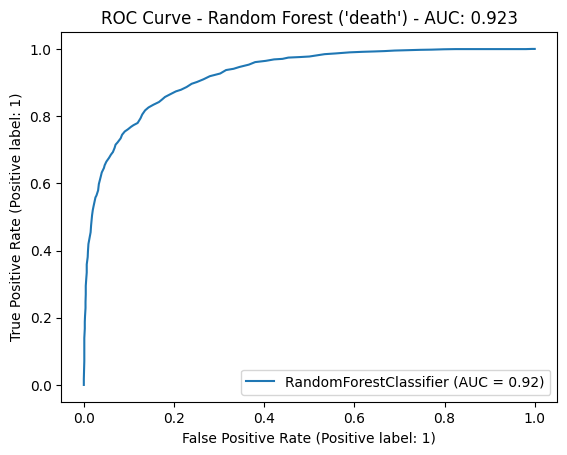

Random Forest Classifier on 'hospdead' (Test Data):
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      2024
           1       0.92      0.94      0.93      2023

    accuracy                           0.93      4047
   macro avg       0.93      0.93      0.93      4047
weighted avg       0.93      0.93      0.93      4047

Confusion Matrix:
[[1868  156]
 [ 112 1911]]


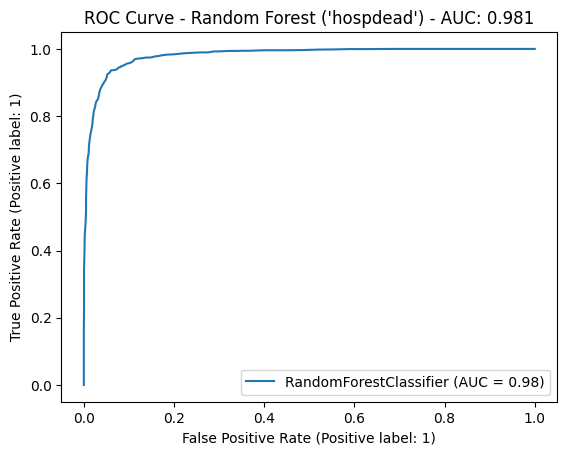

In [5]:
# ===============================================
# Modeling: RandomForestClassifier with Train/Test Split
# ===============================================
# Purpose:
# - Train and evaluate RandomForestClassifier models for both 'death' and 'hospdead' targets.
# - Use stratified train/test splits to ensure class balance.
# - Evaluate model performance using classification report, confusion matrix, and ROC curve.
# - Document each step for reproducibility and interpretability.

# Step 1: Import essential libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt

# Step 2: Load balanced datasets from saved parquet files
# Rationale: Ensure consistent and reproducible modeling across different sessions.
Xy_smote_death = pd.read_parquet('../../data/Xy_smote_death.parquet')
X_death = Xy_smote_death.drop(columns=['death'])
y_death = Xy_smote_death['death']

Xy_smote_hospdead = pd.read_parquet('../../data/Xy_smote_hospdead.parquet')
X_hospdead = Xy_smote_hospdead.drop(columns=['hospdead'])
y_hospdead = Xy_smote_hospdead['hospdead']

# Step 3: Split datasets into training and testing sets
# Rationale: Evaluate model performance on unseen data to avoid overfitting.
# Stratified splitting preserves class balance.
X_train_death, X_test_death, y_train_death, y_test_death = train_test_split(
    X_death, y_death, test_size=0.3, random_state=42, stratify=y_death
)
X_train_hospdead, X_test_hospdead, y_train_hospdead, y_test_hospdead = train_test_split(
    X_hospdead, y_hospdead, test_size=0.3, random_state=42, stratify=y_hospdead
)

# Step 4: Train RandomForestClassifier on 'death' target
# Rationale: RandomForest is a robust ensemble model that handles non-linearities and class imbalance.
rf_death = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',
    random_state=42
)
rf_death.fit(X_train_death, y_train_death)

# Step 5: Evaluate RandomForestClassifier on 'death' test set
# Rationale: Assess the model’s generalization performance using standard metrics.
y_pred_death = rf_death.predict(X_test_death)

print("Random Forest Classifier on 'death' (Test Data):")
print(classification_report(y_test_death, y_pred_death))
print("Confusion Matrix:")
print(confusion_matrix(y_test_death, y_pred_death))

# Calculate and plot ROC Curve
roc_auc_death = roc_auc_score(y_test_death, rf_death.predict_proba(X_test_death)[:, 1])
RocCurveDisplay.from_estimator(rf_death, X_test_death, y_test_death)
plt.title(f"ROC Curve - Random Forest ('death') - AUC: {roc_auc_death:.3f}")
plt.show()

# Step 6: Train RandomForestClassifier on 'hospdead' target
# Rationale: Repeat the process for the second target variable.
rf_hospdead = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',
    random_state=42
)
rf_hospdead.fit(X_train_hospdead, y_train_hospdead)

# Step 7: Evaluate RandomForestClassifier on 'hospdead' test set
y_pred_hospdead = rf_hospdead.predict(X_test_hospdead)

print("Random Forest Classifier on 'hospdead' (Test Data):")
print(classification_report(y_test_hospdead, y_pred_hospdead))
print("Confusion Matrix:")
print(confusion_matrix(y_test_hospdead, y_pred_hospdead))

# Calculate and plot ROC Curve
roc_auc_hospdead = roc_auc_score(y_test_hospdead, rf_hospdead.predict_proba(X_test_hospdead)[:, 1])
RocCurveDisplay.from_estimator(rf_hospdead, X_test_hospdead, y_test_hospdead)
plt.title(f"ROC Curve - Random Forest ('hospdead') - AUC: {roc_auc_hospdead:.3f}")
plt.show()


Top 20 features for 'death': ['dnr_no dnr', 'prg6m', 'surv6m', 'prg2m', 'dnrday', 'surv2m', 'avtisst', 'age', 'sps', 'aps']
Top 20 features for 'hospdead': ['dnr_no dnr', 'avtisst', 'prg2m', 'surv2m', 'prg6m', 'surv6m', 'dnrday', 'sps', 'aps', 'hday']
Random Forest Classifier on 'death' (Test Data) - Top Features:
              precision    recall  f1-score   support

           0       0.79      0.88      0.83      1861
           1       0.86      0.77      0.81      1860

    accuracy                           0.82      3721
   macro avg       0.83      0.82      0.82      3721
weighted avg       0.83      0.82      0.82      3721

Confusion Matrix:
[[1630  231]
 [ 425 1435]]


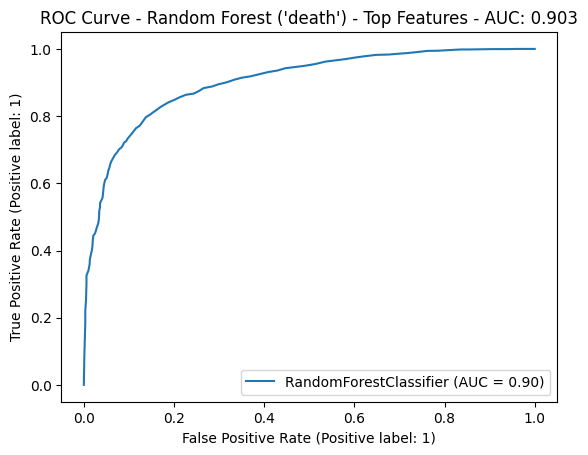

Random Forest Classifier on 'hospdead' (Test Data) - Top Features:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      2024
           1       0.92      0.94      0.93      2023

    accuracy                           0.93      4047
   macro avg       0.93      0.93      0.93      4047
weighted avg       0.93      0.93      0.93      4047

Confusion Matrix:
[[1865  159]
 [ 113 1910]]


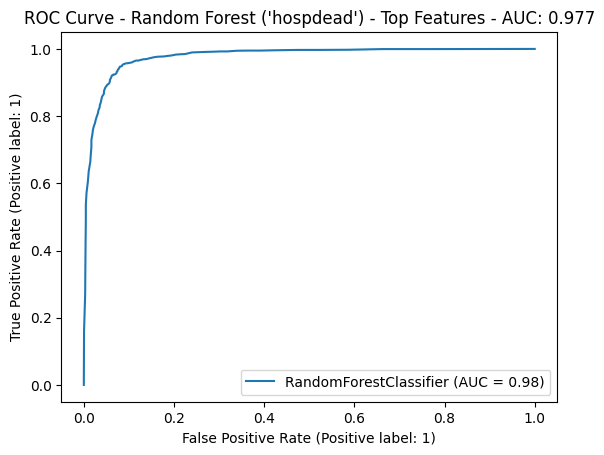

In [7]:
# ===============================================
# Modeling: RandomForestClassifier with Top Features
# ===============================================
# Purpose:
# - Select the top 20 features based on previous feature importance analysis.
# - Retrain and evaluate RandomForestClassifier models on the reduced feature sets.
# - Compare performance with the full feature set.
# - Document each step for reproducibility and interpretability.

# Step 1: Import essential libraries (if not already imported)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay

# Step 2: Load balanced datasets (from saved parquet files)
Xy_smote_death = pd.read_parquet('../../data/Xy_smote_death.parquet')
X_death = Xy_smote_death.drop(columns=['death'])
y_death = Xy_smote_death['death']

Xy_smote_hospdead = pd.read_parquet('../../data/Xy_smote_hospdead.parquet')
X_hospdead = Xy_smote_hospdead.drop(columns=['hospdead'])
y_hospdead = Xy_smote_hospdead['hospdead']

# Step 3: Get feature importances from previous models
# (Note: If you ran this in a previous cell, you can reuse those variables;
# otherwise, load them again if needed.)

# For demonstration, let's assume importances_death_sorted and importances_hospdead_sorted were saved.
# If not, recompute them:
# (Uncomment and run if needed)
rf_death.fit(X_death, y_death)
importances_death = pd.Series(rf_death.feature_importances_, index=X_death.columns)
importances_death_sorted = importances_death.sort_values(ascending=False)

rf_hospdead.fit(X_hospdead, y_hospdead)
importances_hospdead = pd.Series(rf_hospdead.feature_importances_, index=X_hospdead.columns)
importances_hospdead_sorted = importances_hospdead.sort_values(ascending=False)

# Step 4: Select top 20 features for each target
top_features_death = importances_death_sorted.head(10).index.tolist()
top_features_hospdead = importances_hospdead_sorted.head(10).index.tolist()

print("Top 20 features for 'death':", top_features_death)
print("Top 20 features for 'hospdead':", top_features_hospdead)

# Step 5: Split the datasets into training and testing sets (using only the top features)
X_train_death_top, X_test_death_top, y_train_death, y_test_death = train_test_split(
    X_death[top_features_death], y_death, test_size=0.3, random_state=42, stratify=y_death
)
X_train_hospdead_top, X_test_hospdead_top, y_train_hospdead, y_test_hospdead = train_test_split(
    X_hospdead[top_features_hospdead], y_hospdead, test_size=0.3, random_state=42, stratify=y_hospdead
)

# Step 6: Train RandomForestClassifier on 'death' target with top features
rf_death_top = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',
    random_state=42
)
rf_death_top.fit(X_train_death_top, y_train_death)

# Step 7: Evaluate RandomForestClassifier on 'death' test set with top features
y_pred_death_top = rf_death_top.predict(X_test_death_top)

print("Random Forest Classifier on 'death' (Test Data) - Top Features:")
print(classification_report(y_test_death, y_pred_death_top))
print("Confusion Matrix:")
print(confusion_matrix(y_test_death, y_pred_death_top))

# Calculate and plot ROC Curve
roc_auc_death_top = roc_auc_score(y_test_death, rf_death_top.predict_proba(X_test_death_top)[:, 1])
RocCurveDisplay.from_estimator(rf_death_top, X_test_death_top, y_test_death)
plt.title(f"ROC Curve - Random Forest ('death') - Top Features - AUC: {roc_auc_death_top:.3f}")
plt.show()

# Step 8: Train RandomForestClassifier on 'hospdead' target with top features
rf_hospdead_top = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',
    random_state=42
)
rf_hospdead_top.fit(X_train_hospdead_top, y_train_hospdead)

# Step 9: Evaluate RandomForestClassifier on 'hospdead' test set with top features
y_pred_hospdead_top = rf_hospdead_top.predict(X_test_hospdead_top)

print("Random Forest Classifier on 'hospdead' (Test Data) - Top Features:")
print(classification_report(y_test_hospdead, y_pred_hospdead_top))
print("Confusion Matrix:")
print(confusion_matrix(y_test_hospdead, y_pred_hospdead_top))

# Calculate and plot ROC Curve
roc_auc_hospdead_top = roc_auc_score(y_test_hospdead, rf_hospdead_top.predict_proba(X_test_hospdead_top)[:, 1])
RocCurveDisplay.from_estimator(rf_hospdead_top, X_test_hospdead_top, y_test_hospdead)
plt.title(f"ROC Curve - Random Forest ('hospdead') - Top Features - AUC: {roc_auc_hospdead_top:.3f}")
plt.show()


#### Logistic regression Model

Logistic Regression on 'death' (Test Data) - Top Features:
              precision    recall  f1-score   support

           0       0.75      0.82      0.79      1861
           1       0.81      0.73      0.77      1860

    accuracy                           0.78      3721
   macro avg       0.78      0.78      0.78      3721
weighted avg       0.78      0.78      0.78      3721

Confusion Matrix:
[[1534  327]
 [ 501 1359]]


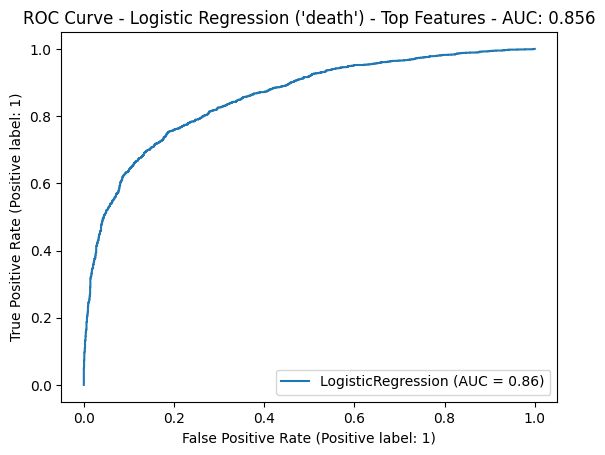

Logistic Regression on 'hospdead' (Test Data) - Top Features:
              precision    recall  f1-score   support

           0       0.90      0.89      0.89      2024
           1       0.89      0.90      0.90      2023

    accuracy                           0.89      4047
   macro avg       0.89      0.89      0.89      4047
weighted avg       0.89      0.89      0.89      4047

Confusion Matrix:
[[1793  231]
 [ 197 1826]]


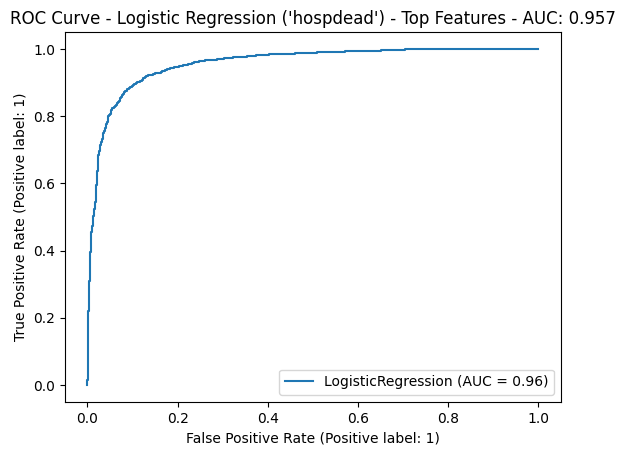

In [9]:
# ===============================================
# Modeling: Logistic Regression with Top Features
# ===============================================
# Purpose:
# - Train and evaluate Logistic Regression models on the balanced datasets.
# - Use the top 20 features (based on earlier feature importance) for interpretability.
# - Compare performance with RandomForest and other models.
# - Document each step for reproducibility and interpretability.

# Step 1: Import essential libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt

# Step 2: Load balanced datasets (from saved parquet files)
Xy_smote_death = pd.read_parquet('../../data/Xy_smote_death.parquet')
X_death = Xy_smote_death.drop(columns=['death'])
y_death = Xy_smote_death['death']

Xy_smote_hospdead = pd.read_parquet('../../data/Xy_smote_hospdead.parquet')
X_hospdead = Xy_smote_hospdead.drop(columns=['hospdead'])
y_hospdead = Xy_smote_hospdead['hospdead']

# Step 3: Select the top 20 features (from previous feature importance)
# (Adjust to top 10 if needed)
top_features_death = ['dnr_no dnr', 'prg6m', 'surv6m', 'prg2m', 'dnrday', 
                      'surv2m', 'avtisst', 'age', 'sps', 'aps', 
                      'num.co', 'ca_no', 'charges', 'adlp', 'totmcst', 
                      'pafi', 'totcst', 'glucose', 'adlsc', 'alb']

top_features_hospdead = ['dnr_no dnr', 'avtisst', 'prg2m', 'surv2m', 'prg6m', 
                         'surv6m', 'dnrday', 'sps', 'aps', 'hday', 
                         'scoma', 'charges', 'totmcst', 'adlp', 'totcst', 
                         'alb', 'bili', 'age', 'pafi', 'glucose']

# Step 4: Split the datasets into training and testing sets (using top features)
X_train_death, X_test_death, y_train_death, y_test_death = train_test_split(
    X_death[top_features_death], y_death, test_size=0.3, random_state=42, stratify=y_death
)
X_train_hospdead, X_test_hospdead, y_train_hospdead, y_test_hospdead = train_test_split(
    X_hospdead[top_features_hospdead], y_hospdead, test_size=0.3, random_state=42, stratify=y_hospdead
)

# Step 5: Train Logistic Regression on 'death' target
# Rationale: Logistic Regression provides interpretable odds ratios and handles class imbalance with 'balanced' class weight.
lr_death = LogisticRegression(
    class_weight='balanced',
    max_iter=1000,
    random_state=42,
    solver='liblinear'  # robust for smaller datasets
)
lr_death.fit(X_train_death, y_train_death)

# Step 6: Evaluate Logistic Regression on 'death' test set
y_pred_death = lr_death.predict(X_test_death)

print("Logistic Regression on 'death' (Test Data) - Top Features:")
print(classification_report(y_test_death, y_pred_death))
print("Confusion Matrix:")
print(confusion_matrix(y_test_death, y_pred_death))

# ROC Curve
roc_auc_death = roc_auc_score(y_test_death, lr_death.predict_proba(X_test_death)[:, 1])
RocCurveDisplay.from_estimator(lr_death, X_test_death, y_test_death)
plt.title(f"ROC Curve - Logistic Regression ('death') - Top Features - AUC: {roc_auc_death:.3f}")
plt.show()

# Step 7: Train Logistic Regression on 'hospdead' target
lr_hospdead = LogisticRegression(
    class_weight='balanced',
    max_iter=1000,
    random_state=42,
    solver='liblinear'
)
lr_hospdead.fit(X_train_hospdead, y_train_hospdead)

# Step 8: Evaluate Logistic Regression on 'hospdead' test set
y_pred_hospdead = lr_hospdead.predict(X_test_hospdead)

print("Logistic Regression on 'hospdead' (Test Data) - Top Features:")
print(classification_report(y_test_hospdead, y_pred_hospdead))
print("Confusion Matrix:")
print(confusion_matrix(y_test_hospdead, y_pred_hospdead))

roc_auc_hospdead = roc_auc_score(y_test_hospdead, lr_hospdead.predict_proba(X_test_hospdead)[:, 1])
RocCurveDisplay.from_estimator(lr_hospdead, X_test_hospdead, y_test_hospdead)
plt.title(f"ROC Curve - Logistic Regression ('hospdead') - Top Features - AUC: {roc_auc_hospdead:.3f}")
plt.show()


/Users/falasoul/.pyenv/versions/3.10.13/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [21:02:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Classifier on 'death' (Test Data) - Top Features:
              precision    recall  f1-score   support

           0       0.83      0.84      0.83      1861
           1       0.84      0.83      0.83      1860

    accuracy                           0.83      3721
   macro avg       0.83      0.83      0.83      3721
weighted avg       0.83      0.83      0.83      3721

Confusion Matrix:
[[1565  296]
 [ 323 1537]]


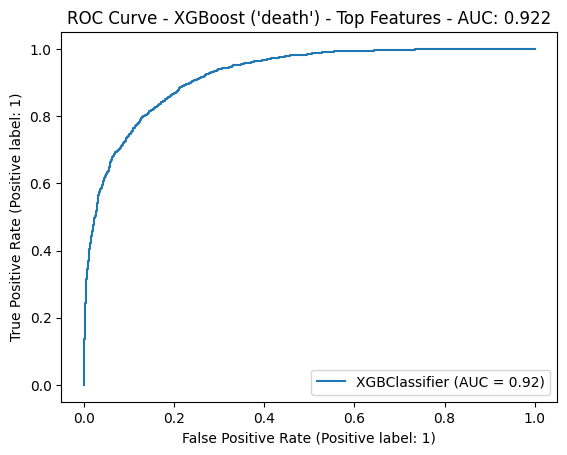

/Users/falasoul/.pyenv/versions/3.10.13/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [21:02:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



XGBoost Classifier on 'hospdead' (Test Data) - Top Features:
              precision    recall  f1-score   support

           0       0.94      0.93      0.94      2024
           1       0.93      0.94      0.94      2023

    accuracy                           0.94      4047
   macro avg       0.94      0.94      0.94      4047
weighted avg       0.94      0.94      0.94      4047

Confusion Matrix:
[[1881  143]
 [ 115 1908]]


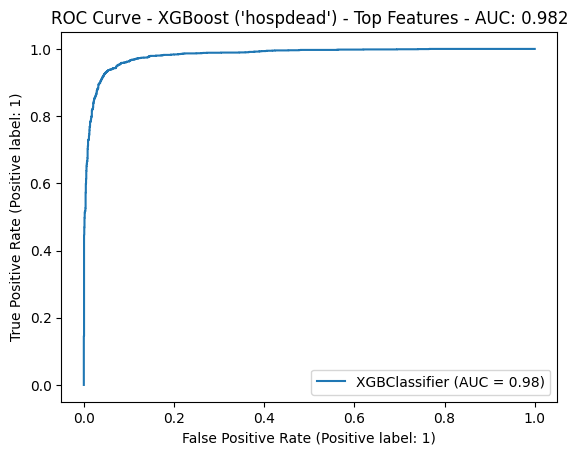

In [21]:
# ===============================================
# Modeling: XGBoost Classifier for 'death' and 'hospdead'
# ===============================================
# Purpose:
# - Train and evaluate XGBoost models on both 'death' and 'hospdead' targets.
# - Ensure features are fully numeric, unique, and handle missing values.
# - Report evaluation metrics including confusion matrix and AUC.
# - Plot ROC curves for each model.

# Step 1: Import required libraries
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt

# Step 2: Load the balanced datasets from saved parquet files
Xy_smote_death = pd.read_parquet('../../data/Xy_smote_death.parquet')
Xy_smote_hospdead = pd.read_parquet('../../data/Xy_smote_hospdead.parquet')

# Separate features and targets
X_death = Xy_smote_death.drop(columns=['death'])
y_death = Xy_smote_death['death']
X_hospdead = Xy_smote_hospdead.drop(columns=['hospdead'])
y_hospdead = Xy_smote_hospdead['hospdead']

# Step 3: Define top features (deduplicated)
top_features_death = [
    'dnr_no dnr', 'prg6m', 'surv6m', 'prg2m', 'dnrday',
    'surv2m', 'avtisst', 'age', 'sps', 'aps',
    'num.co', 'ca_no', 'charges', 'adlp',
    'totmcst', 'pafi', 'totcst', 'glucose',
    'adlsc', 'alb'
]

top_features_hospdead = [
    'dnr_no dnr', 'avtisst', 'prg2m', 'surv2m', 'prg6m',
    'surv6m', 'dnrday', 'sps', 'aps', 'hday',
    'scoma', 'charges', 'totmcst', 'adlp',
    'alb', 'bili', 'age', 'pafi', 'glucose'
]

# Step 4: Preprocess features
def preprocess_features(X, feature_list):
    """
    - Select relevant features.
    - Encode object/categorical columns to numeric codes.
    - Convert all columns to float.
    - Fill missing values with median.
    """
    X_top = X[feature_list].copy()

    # Encode object or category features
    for col in X_top.columns:
        if X_top[col].dtype == 'object' or str(X_top[col].dtype).startswith('category'):
            X_top[col] = X_top[col].astype('category').cat.codes

    # Convert all to float
    X_top = X_top.astype(float)

    # Fill missing values
    X_top = X_top.fillna(X_top.median())
    
    return X_top

# Apply preprocessing
X_death_top = preprocess_features(X_death, top_features_death)
X_hospdead_top = preprocess_features(X_hospdead, top_features_hospdead)

# Step 5: Split data
X_train_death, X_test_death, y_train_death, y_test_death = train_test_split(
    X_death_top, y_death, test_size=0.3, random_state=42, stratify=y_death
)
X_train_hospdead, X_test_hospdead, y_train_hospdead, y_test_hospdead = train_test_split(
    X_hospdead_top, y_hospdead, test_size=0.3, random_state=42, stratify=y_hospdead
)

# Step 6: Initialize and train XGBoost Classifier for 'death'
xgb_death = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    scale_pos_weight=1,
    use_label_encoder=False,
    random_state=42
)
xgb_death.fit(X_train_death, y_train_death)

# Step 7: Evaluate XGBoost Classifier on 'death' test set
y_pred_death = xgb_death.predict(X_test_death)
print("XGBoost Classifier on 'death' (Test Data) - Top Features:")
print(classification_report(y_test_death, y_pred_death))
print("Confusion Matrix:")
print(confusion_matrix(y_test_death, y_pred_death))

# Plot ROC Curve for 'death'
roc_auc_death = roc_auc_score(y_test_death, xgb_death.predict_proba(X_test_death)[:, 1])
RocCurveDisplay.from_estimator(xgb_death, X_test_death, y_test_death)
plt.title(f"ROC Curve - XGBoost ('death') - Top Features - AUC: {roc_auc_death:.3f}")
plt.show()

# Step 8: Initialize and train XGBoost Classifier for 'hospdead'
xgb_hospdead = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    scale_pos_weight=1,
    use_label_encoder=False,
    random_state=42
)
xgb_hospdead.fit(X_train_hospdead, y_train_hospdead)

# Step 9: Evaluate XGBoost Classifier on 'hospdead' test set
y_pred_hospdead = xgb_hospdead.predict(X_test_hospdead)
print("\nXGBoost Classifier on 'hospdead' (Test Data) - Top Features:")
print(classification_report(y_test_hospdead, y_pred_hospdead))
print("Confusion Matrix:")
print(confusion_matrix(y_test_hospdead, y_pred_hospdead))

# Plot ROC Curve for 'hospdead'
roc_auc_hospdead = roc_auc_score(y_test_hospdead, xgb_hospdead.predict_proba(X_test_hospdead)[:, 1])
RocCurveDisplay.from_estimator(xgb_hospdead, X_test_hospdead, y_test_hospdead)
plt.title(f"ROC Curve - XGBoost ('hospdead') - Top Features - AUC: {roc_auc_hospdead:.3f}")
plt.show()
